In [1]:
#STEP-1 Import libraries 
import numpy as np
import numpy as np
import pandas as pd 
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from numpy import int64
from sklearn import svm
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from pyhive import hive
#from impala.dbapi import connect
from hdfs import InsecureClient
from pyhive import hive
import pandas as pd
from scipy import stats
from sklearn.utils import resample
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
from pandas.plotting import scatter_matrix
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pyspark.sql 
from pyspark.sql.functions import desc
from pyspark.ml.classification import MultilayerPerceptronClassifier
sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

/home/smicro/.local/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning
/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [4]:
#STEP-2 Read data from HIVE
from pyspark.sql import HiveContext
from pyspark import SparkConf
spark = SparkSession(sc)
hive_context = HiveContext(sc)
sqlContext = SQLContext(sc)
#bank1 = sqlContext.table("sda_hdd_db.sda_hdd_all")
dataset = sqlContext.sql("SELECT * FROM events1.smartdata_hourly_view")

In [6]:
#CONVERT AS DataFrame & PULL TOP 7000 RECORDS
dataset = pd.DataFrame(dataset.head(7000), columns=dataset.columns)

In [4]:
#create database connection variable 
#conn = psycopg2.connect(user="user", password="password", host="xxx.xxx.xxx.xxx", database="db_name")
#conn = psycopg2.connect(user="data_user", password="kgtopg8932", host="localhost", database="rawData")
#query = "select * from schema1.client_google" 
#dataset = sqlio.read_sql_query(query,conn)


In [5]:
#VIEW DATASET
dataset

DataFrame[rowno: int, modif_date: string, process_date: timestamp, serial_number: string, model: string, capacity_bytes: bigint, failure: bigint, smart_1_normalized: bigint, smart_1_raw: bigint, smart_2_normalized: bigint, smart_2_raw: bigint, smart_3_normalized: bigint, smart_3_raw: bigint, smart_4_normalized: bigint, smart_4_raw: bigint, smart_5_normalized: bigint, smart_5_raw: bigint, smart_7_normalized: bigint, smart_7_raw: bigint, smart_8_normalized: bigint, smart_8_raw: bigint, smart_9_normalized: bigint, smart_9_raw: bigint, smart_10_normalized: bigint, smart_10_raw: bigint, smart_11_normalized: bigint, smart_11_raw: bigint, smart_12_normalized: bigint, smart_12_raw: bigint, smart_13_normalized: bigint, smart_13_raw: bigint, smart_15_normalized: bigint, smart_15_raw: bigint, smart_16_normalized: bigint, smart_16_raw: bigint, smart_17_normalized: bigint, smart_17_raw: bigint, smart_18_normalized: bigint, smart_18_raw: bigint, smart_22_normalized: bigint, smart_22_raw: bigint, sma

In [6]:
#Know the Missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\missing_data1.csv')

Text(0.5, 1.0, 'smart_1_normalized')

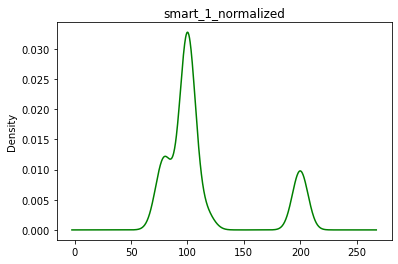

In [7]:
dataset.smart_1_normalized.plot.density(color='green')
plt.title('smart_1_normalized')

Text(0.5, 1.0, 'smart_2_normalized')

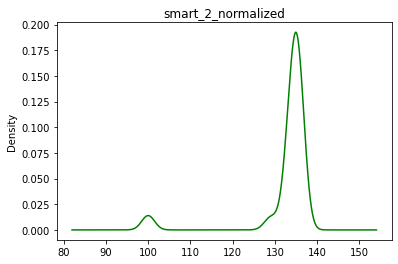

In [8]:
dataset.smart_2_normalized.plot.density(color='green')
plt.title('smart_2_normalized')

Text(0.5, 1.0, 'smart_2_raw')

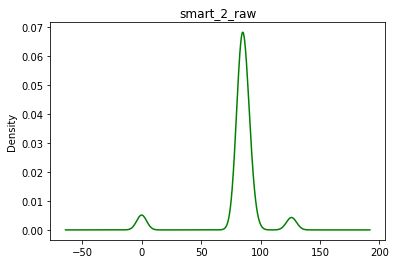

In [9]:
dataset.smart_2_raw.plot.density(color='green')
plt.title('smart_2_raw')

Text(0.5, 1.0, 'smart_3_normalized')

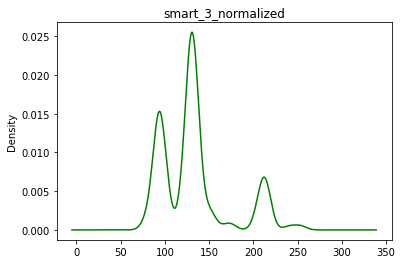

In [10]:
dataset.smart_3_normalized.plot.density(color='green')
plt.title('smart_3_normalized')

Text(0.5, 1.0, 'smart_3_raw')

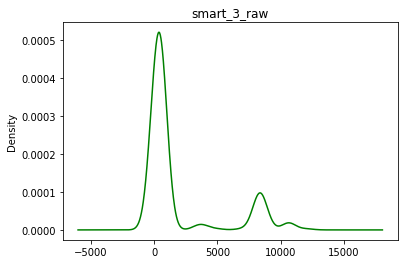

In [11]:
dataset.smart_3_raw.plot.density(color='green')
plt.title('smart_3_raw')

Text(0.5, 1.0, 'smart_4_normalized')

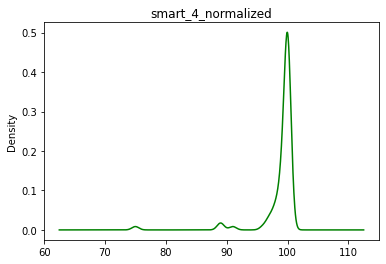

In [12]:
dataset.smart_4_normalized.plot.density(color='green')
plt.title('smart_4_normalized')

Text(0.5, 1.0, 'smart_4_raw')

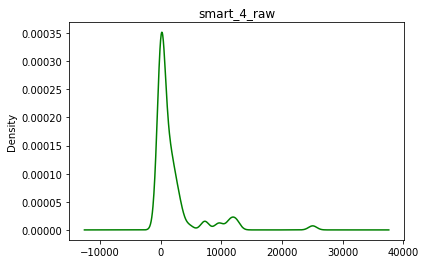

In [13]:
dataset.smart_4_raw.plot.density(color='green')
plt.title('smart_4_raw')

Text(0.5, 1.0, 'smart_5_normalized')

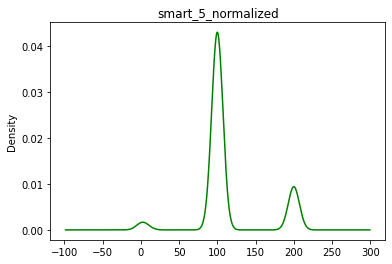

In [14]:
dataset.smart_5_normalized.plot.density(color='green')
plt.title('smart_5_normalized')

Text(0.5, 1.0, 'smart_7_normalized')

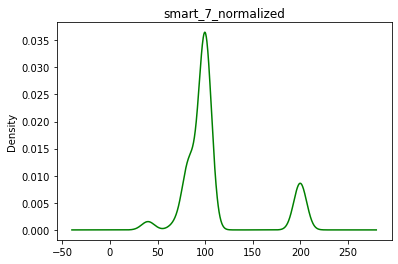

In [15]:
dataset.smart_7_normalized.plot.density(color='green')
plt.title('smart_7_normalized')

Text(0.5, 1.0, 'smart_8_raw')

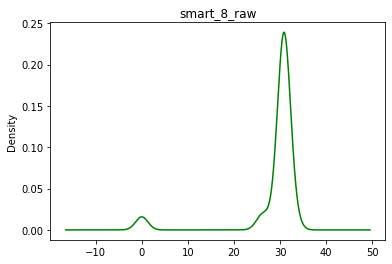

In [16]:
dataset.smart_8_raw.plot.density(color='green')
plt.title('smart_8_raw')

Text(0.5, 1.0, 'smart_9_normalized')

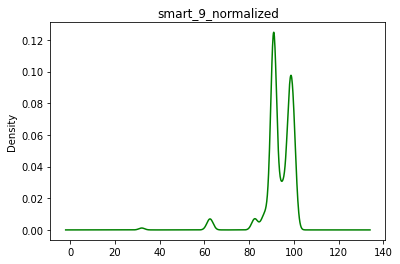

In [17]:
dataset.smart_9_normalized.plot.density(color='green')
plt.title('smart_9_normalized')

Text(0.5, 1.0, 'smart_10_normalized')

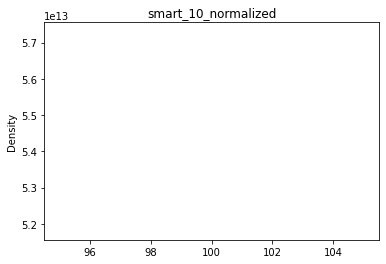

In [18]:
dataset.smart_10_normalized.plot.density(color='green')
plt.title('smart_10_normalized')

Text(0.5, 1.0, 'smart_11_normalized')

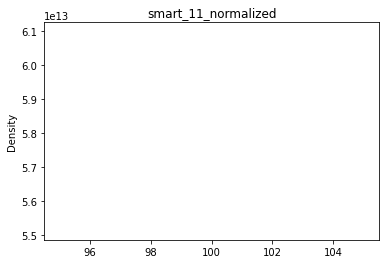

In [19]:
dataset.smart_11_normalized.plot.density(color='green')
plt.title('smart_11_normalized')

Text(0.5, 1.0, 'smart_12_normalized')

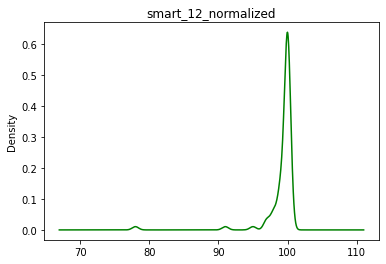

In [20]:
dataset.smart_12_normalized.plot.density(color='green')
plt.title('smart_12_normalized')

Text(0.5, 1.0, 'smart_22_normalized')

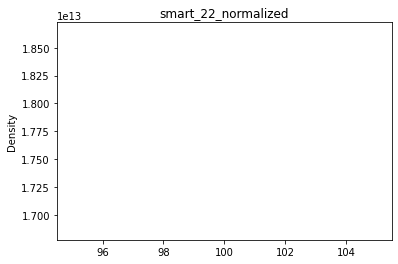

In [23]:
dataset.smart_22_normalized.plot.density(color='green')
plt.title('smart_22_normalized')

Text(0.5, 1.0, 'smart_22_raw')

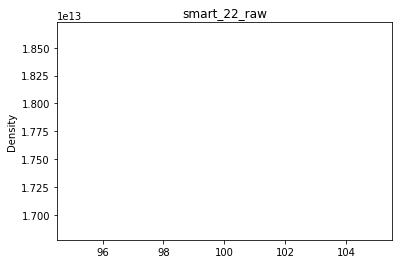

In [24]:
dataset.smart_22_raw.plot.density(color='green')
plt.title('smart_22_raw')

In [25]:
dataset.smart_23_normalized.plot.density(color='green')
plt.title('smart_23_normalized')

TypeError: no numeric data to plot

Text(0.5, 1.0, 'smart_160_normalized')

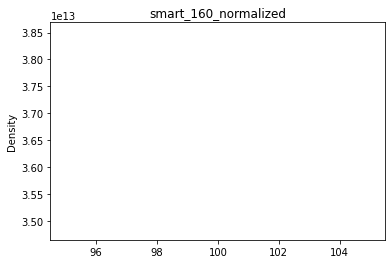

In [37]:
dataset.smart_160_normalized.plot.density(color='green')
plt.title('smart_160_normalized')

In [27]:
dataset.smart_160_raw.plot.density(color='green')
plt.title('smart_160_raw')

TypeError: no numeric data to plot

Text(0.5, 1.0, 'smart_161_normalized')

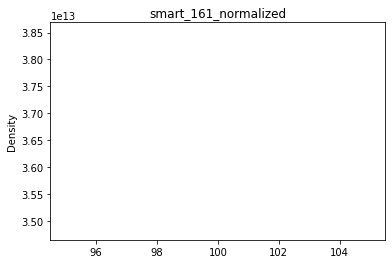

In [39]:
dataset.smart_161_normalized.plot.density(color='green')
plt.title('smart_161_normalized')

Text(0.5, 1.0, 'smart_161_raw')

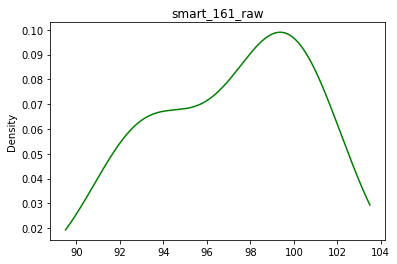

In [40]:
dataset.smart_161_raw.plot.density(color='green')
plt.title('smart_161_raw')

Text(0.5, 1.0, 'smart_163_normalized')

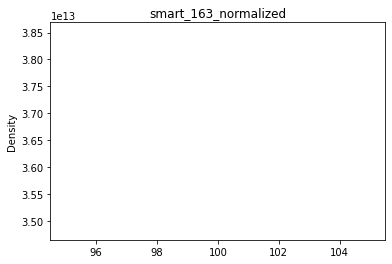

In [41]:
dataset.smart_163_normalized.plot.density(color='green')
plt.title('smart_163_normalized')

Text(0.5, 1.0, 'smart_163_raw')

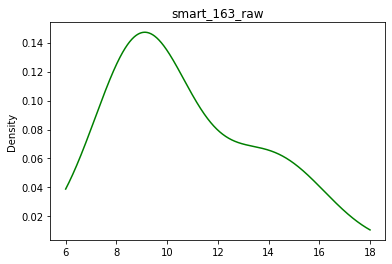

In [42]:
dataset.smart_163_raw.plot.density(color='green')
plt.title('smart_163_raw')

Text(0.5, 1.0, 'smart_164_normalized')

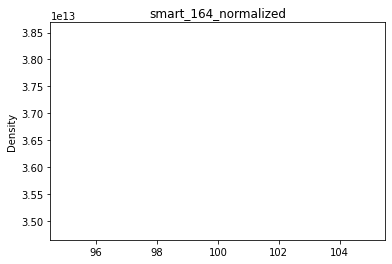

In [43]:
dataset.smart_164_normalized.plot.density(color='green')
plt.title('smart_164_normalized')

Text(0.5, 1.0, 'smart_165_normalized')

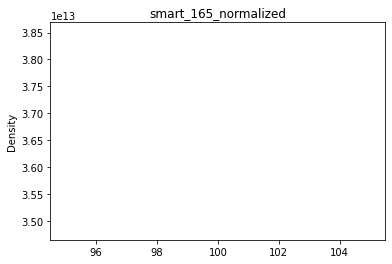

In [44]:
dataset.smart_165_normalized.plot.density(color='green')
plt.title('smart_165_normalized')

Text(0.5, 1.0, 'smart_165_raw')

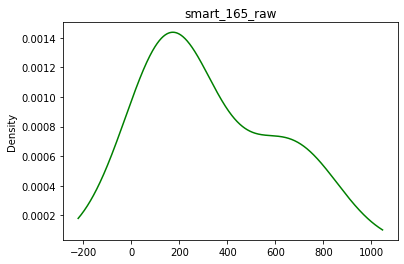

In [45]:
dataset.smart_165_raw.plot.density(color='green')
plt.title('smart_165_raw')

Text(0.5, 1.0, 'smart_166_normalized')

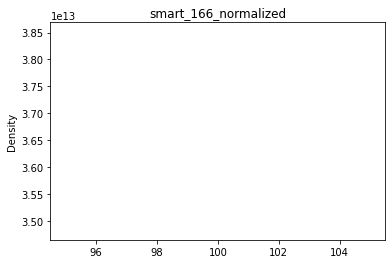

In [46]:
dataset.smart_166_normalized.plot.density(color='green')
plt.title('smart_166_normalized')

Text(0.5, 1.0, 'smart_167_normalized')

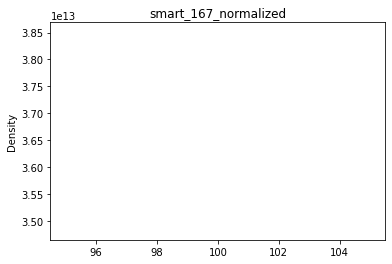

In [47]:
dataset.smart_167_normalized.plot.density(color='green')
plt.title('smart_167_normalized')

Text(0.5, 1.0, 'smart_168_normalized')

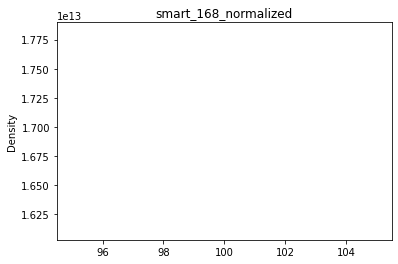

In [48]:
dataset.smart_168_normalized.plot.density(color='green')
plt.title('smart_168_normalized')

Text(0.5, 1.0, 'smart_168_raw')

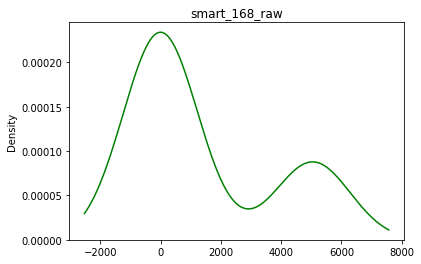

In [49]:
dataset.smart_168_raw.plot.density(color='green')
plt.title('smart_168_raw')

Text(0.5, 1.0, 'smart_169_normalized')

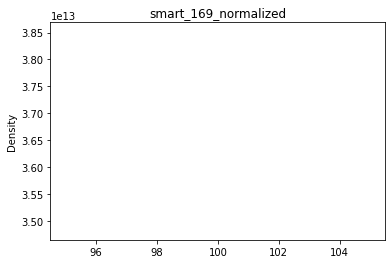

In [50]:
dataset.smart_169_normalized.plot.density(color='green')
plt.title('smart_169_normalized')

Text(0.5, 1.0, 'smart_169_raw')

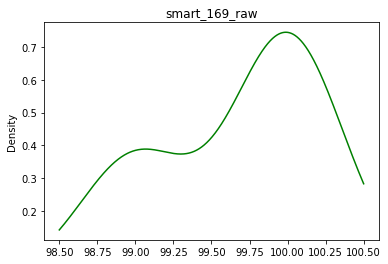

In [51]:
dataset.smart_169_raw.plot.density(color='green')
plt.title('smart_169_raw')

LinAlgError: singular matrix

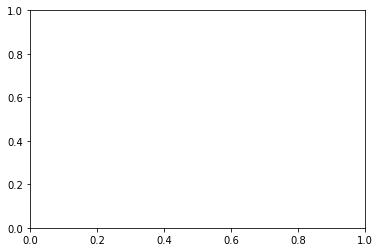

In [52]:
dataset.smart_170_normalized.plot.density(color='green')
plt.title('smart_170_normalized')

Text(0.5, 1.0, 'smart_170_raw')

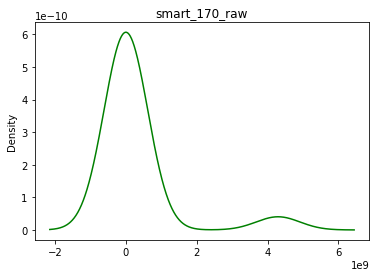

In [53]:
dataset.smart_170_raw.plot.density(color='green')
plt.title('smart_170_raw')

LinAlgError: singular matrix

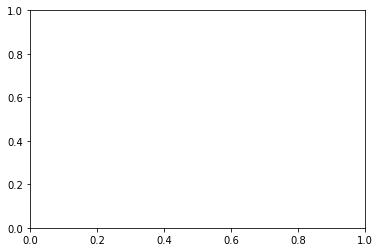

In [54]:
dataset.smart_173_normalized.plot.density(color='green')
plt.title('smart_173_normalized')

In [ ]:
dataset.smart_174_normalized.plot.density(color='green')
plt.title('smart_174_normalized')

Text(0.5, 1.0, 'smart_174_raw')

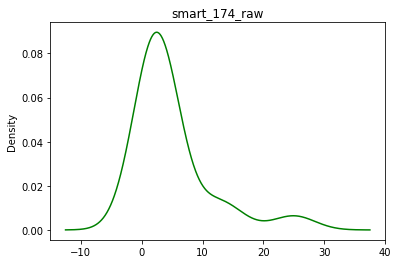

In [55]:
dataset.smart_174_raw.plot.density(color='green')
plt.title('smart_174_raw')

LinAlgError: singular matrix

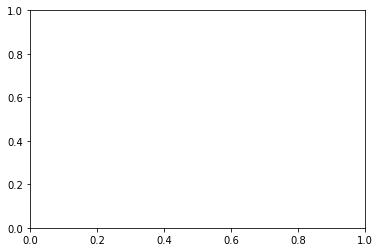

In [56]:
dataset.smart_175_normalized.plot.density(color='green')
plt.title('smart_175_normalized')

Text(0.5, 1.0, 'smart_176_normalized')

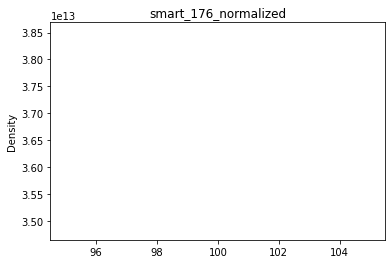

In [57]:
dataset.smart_176_normalized.plot.density(color='green')
plt.title('smart_176_normalized')

Text(0.5, 1.0, 'smart_177_raw')

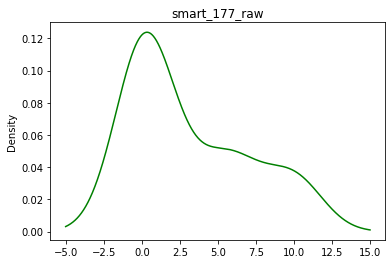

In [58]:
dataset.smart_177_raw.plot.density(color='green')
plt.title('smart_177_raw')

Text(0.5, 1.0, 'smart_178_normalized')

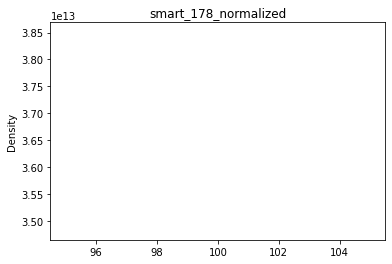

In [59]:
dataset.smart_178_normalized.plot.density(color='green')
plt.title('smart_178_normalized')

Text(0.5, 1.0, 'smart_178_raw')

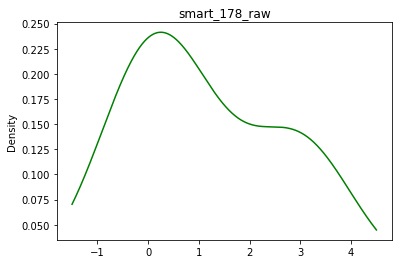

In [60]:
dataset.smart_178_raw.plot.density(color='green')
plt.title('smart_178_raw')

LinAlgError: singular matrix

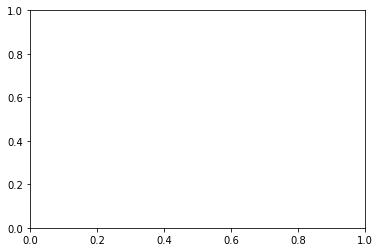

In [61]:
dataset.smart_179_normalized.plot.density(color='green')
plt.title('smart_179_normalized')

Text(0.5, 1.0, 'smart_180_normalized')

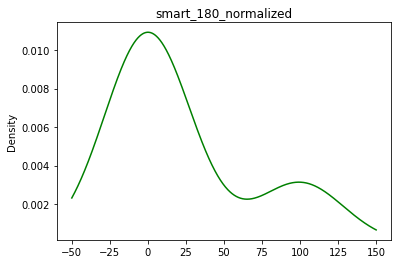

In [62]:
dataset.smart_180_normalized.plot.density(color='green')
plt.title('smart_180_normalized')

Text(0.5, 1.0, 'smart_180_raw')

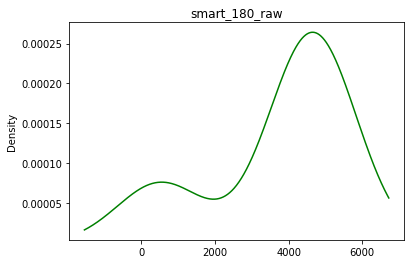

In [63]:
dataset.smart_180_raw.plot.density(color='green')
plt.title('smart_180_raw')

LinAlgError: singular matrix

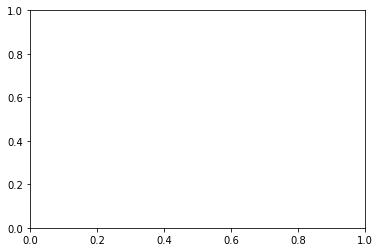

In [64]:
dataset.smart_181_normalized.plot.density(color='green')
plt.title('smart_181_normalized')

LinAlgError: singular matrix

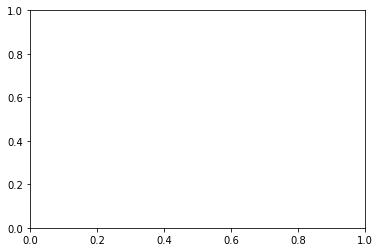

In [65]:
dataset.smart_182_normalized.plot.density(color='green')
plt.title('smart_182_normalized')

Text(0.5, 1.0, 'smart_183_normalized')

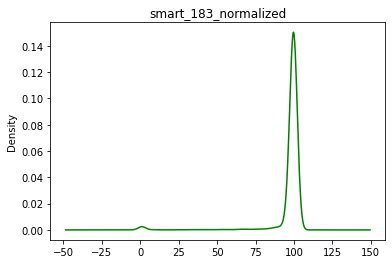

In [66]:
dataset.smart_183_normalized.plot.density(color='green')
plt.title('smart_183_normalized')

Text(0.5, 1.0, 'smart_183_raw')

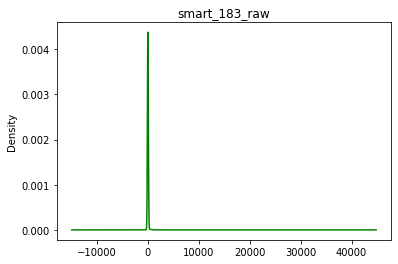

In [67]:
dataset.smart_183_raw.plot.density(color='green')
plt.title('smart_183_raw')

Text(0.5, 1.0, 'smart_184_normalized')

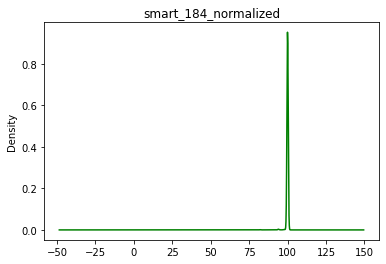

In [68]:
dataset.smart_184_normalized.plot.density(color='green')
plt.title('smart_184_normalized')

Text(0.5, 1.0, 'smart_184_raw')

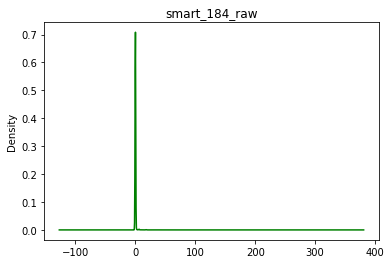

In [69]:
dataset.smart_184_raw.plot.density(color='green')
plt.title('smart_184_raw')

Text(0.5, 1.0, 'smart_187_normalized')

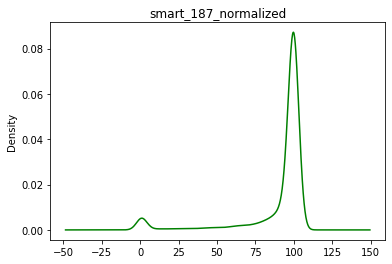

In [70]:
dataset.smart_187_normalized.plot.density(color='green')
plt.title('smart_187_normalized')

Text(0.5, 1.0, 'smart_187_raw')

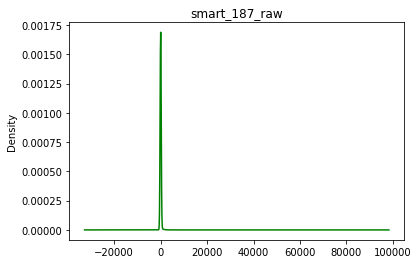

In [71]:
dataset.smart_187_raw.plot.density(color='green')
plt.title('smart_187_raw')

Text(0.5, 1.0, 'smart_188_normalized')

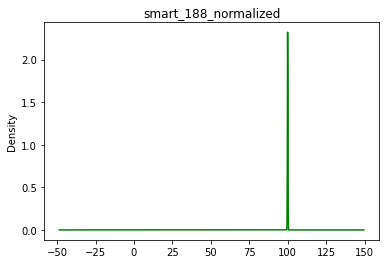

In [72]:
dataset.smart_188_normalized.plot.density(color='green')
plt.title('smart_188_normalized')

Text(0.5, 1.0, 'smart_189_normalized')

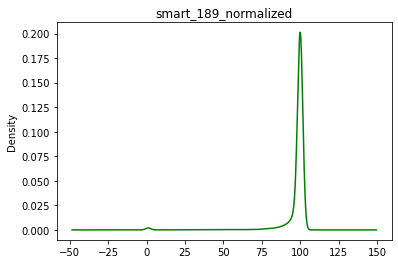

In [73]:
dataset.smart_189_normalized.plot.density(color='green')
plt.title('smart_189_normalized')

Text(0.5, 1.0, 'smart_189_raw')

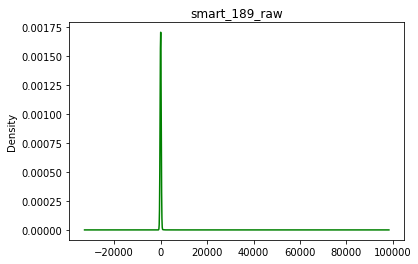

In [74]:
dataset.smart_189_raw.plot.density(color='green')
plt.title('smart_189_raw')

Text(0.5, 1.0, 'smart_191_normalized')

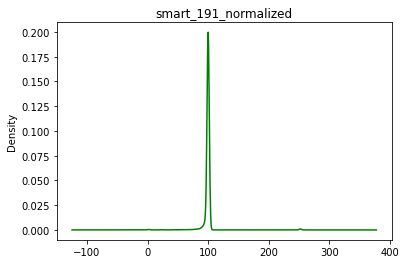

In [75]:
dataset.smart_191_normalized.plot.density(color='green')
plt.title('smart_191_normalized')

Text(0.5, 1.0, 'smart_191_raw')

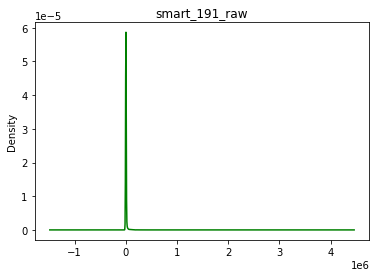

In [76]:
dataset.smart_191_raw.plot.density(color='green')
plt.title('smart_191_raw')

Text(0.5, 1.0, 'smart_192_normalized')

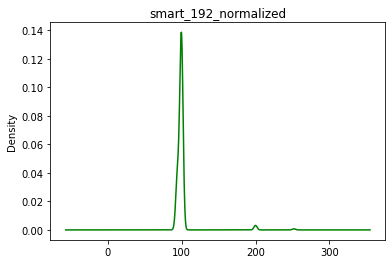

In [77]:
dataset.smart_192_normalized.plot.density(color='green')
plt.title('smart_192_normalized')

Text(0.5, 1.0, 'smart_193_normalized')

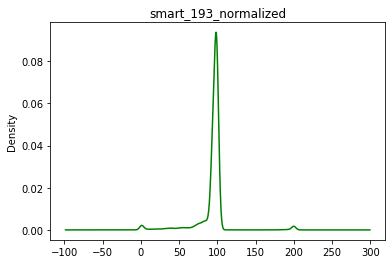

In [78]:
dataset.smart_193_normalized.plot.density(color='green')
plt.title('smart_193_normalized')

Text(0.5, 1.0, 'smart_194_normalized')

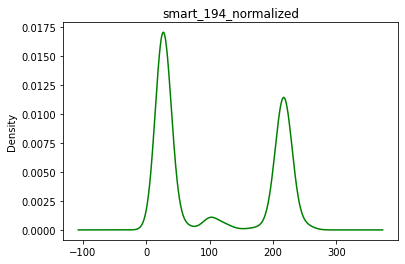

In [79]:
dataset.smart_194_normalized.plot.density(color='green')
plt.title('smart_194_normalized')

Text(0.5, 1.0, 'smart_194_raw')

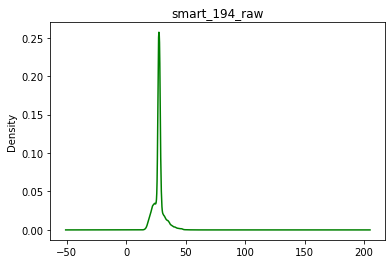

In [80]:
dataset.smart_194_raw.plot.density(color='green')
plt.title('smart_194_raw')

Text(0.5, 1.0, 'smart_195_normalized')

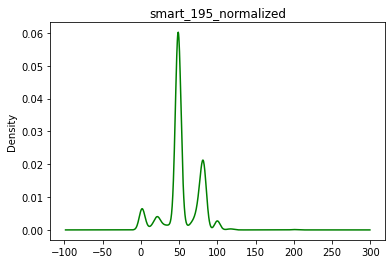

In [81]:
dataset.smart_195_normalized.plot.density(color='green')
plt.title('smart_195_normalized')

Text(0.5, 1.0, 'smart_196_raw')

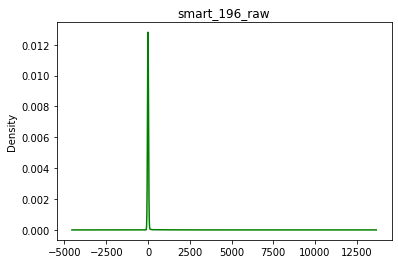

In [82]:
dataset.smart_196_raw.plot.density(color='green')
plt.title('smart_196_raw')

Text(0.5, 1.0, 'smart_197_normalized')

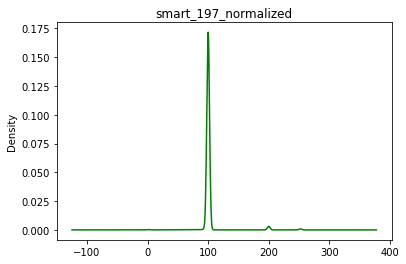

In [83]:
dataset.smart_197_normalized.plot.density(color='green')
plt.title('smart_197_normalized')

Text(0.5, 1.0, 'smart_198_normalized')

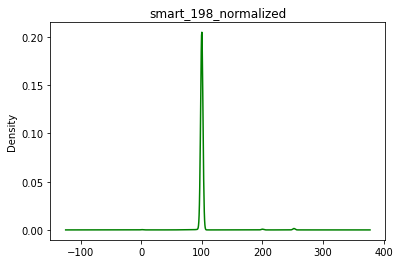

In [84]:
dataset.smart_198_normalized.plot.density(color='green')
plt.title('smart_198_normalized')

Text(0.5, 1.0, 'smart_199_normalized')

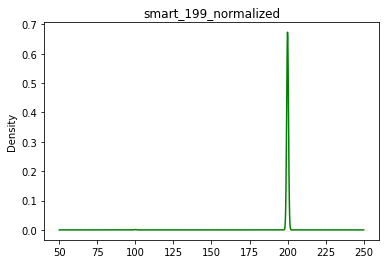

In [85]:
dataset.smart_199_normalized.plot.density(color='green')
plt.title('smart_199_normalized')

Text(0.5, 1.0, 'smart_199_raw')

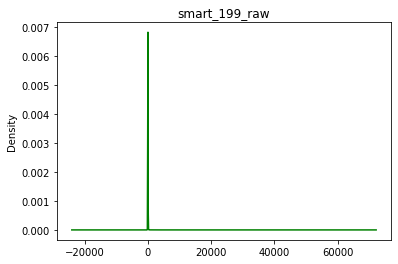

In [86]:
dataset.smart_199_raw.plot.density(color='green')
plt.title('smart_199_raw')

Text(0.5, 1.0, 'smart_200_normalized')

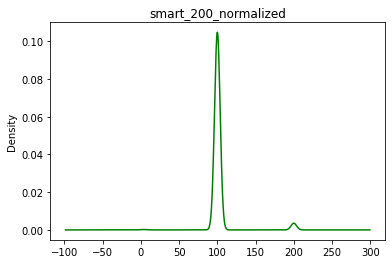

In [87]:
dataset.smart_200_normalized.plot.density(color='green')
plt.title('smart_200_normalized')

Text(0.5, 1.0, 'smart_200_raw')

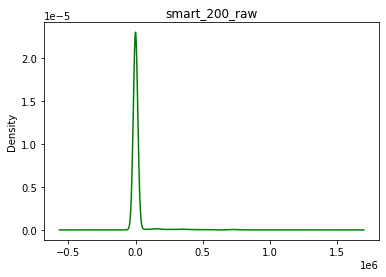

In [88]:
dataset.smart_200_raw.plot.density(color='green')
plt.title('smart_200_raw')

Text(0.5, 1.0, 'smart_200_raw')

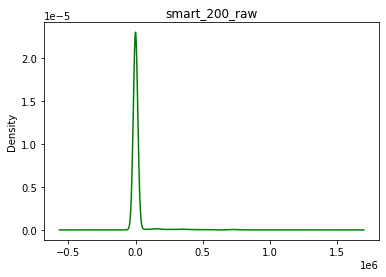

In [104]:
dataset.smart_200_raw.plot.density(color='green')
plt.title('smart_200_raw')

Text(0.5, 1.0, 'smart_201_raw')

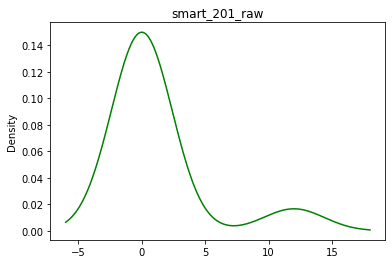

In [90]:
dataset.smart_201_raw.plot.density(color='green')
plt.title('smart_201_raw')

Text(0.5, 1.0, 'smart_202_normalized')

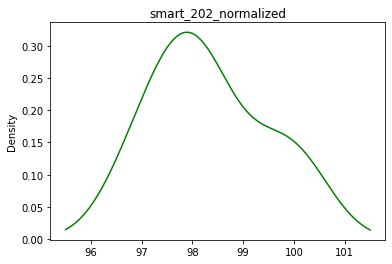

In [91]:
dataset.smart_202_normalized.plot.density(color='green')
plt.title('smart_202_normalized')

LinAlgError: singular matrix

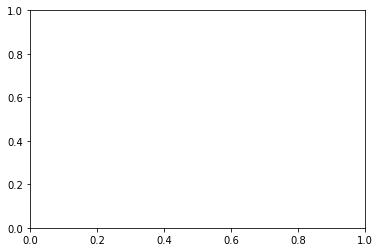

In [92]:
dataset.smart_210_normalized.plot.density(color='green')
plt.title('smart_210_normalized')

LinAlgError: singular matrix

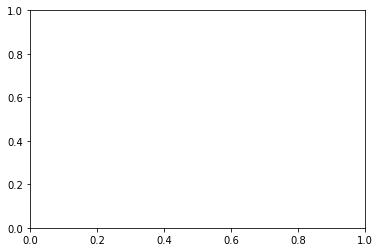

In [11]:
dataset.smart_218_normalized.plot.density(color='green')
plt.title('smart_218_normalized')

In [ ]:
dataset.smart_218_raw.plot.density(color='green')
plt.title('smart_218_raw')

In [ ]:
dataset.smart_220_normalized.plot.density(color='green')
plt.title('smart_220_normalized')

In [ ]:
dataset.smart_220_raw.plot.density(color='green')
plt.title('smart_220_raw')

In [ ]:
dataset.smart_222_raw.plot.density(color='green')
plt.title('smart_222_raw')

In [ ]:
dataset.smart_223_normalized.plot.density(color='green')
plt.title('smart_223_normalized')

In [ ]:
dataset.smart_223_raw.plot.density(color='green')
plt.title('smart_223_raw')

In [ ]:
dataset.smart_224_normalized.plot.density(color='green')
plt.title('smart_224_normalized')

In [ ]:
dataset.smart_225_normalized.plot.density(color='green')
plt.title('smart_225_normalized')

In [ ]:
dataset.smart_226_normalized.plot.density(color='green')
plt.title('smart_226_normalized')

In [ ]:
dataset.smart_231_normalized.plot.density(color='green')
plt.title('smart_231_normalized')

Text(0.5, 1.0, 'smart_231_raw')

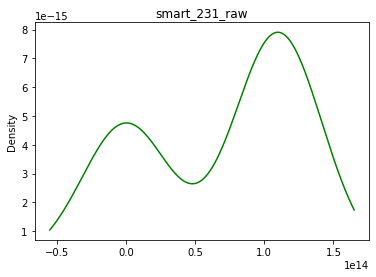

In [93]:
dataset.smart_231_raw.plot.density(color='green')
plt.title('smart_231_raw')

Text(0.5, 1.0, 'smart_232_normalized')

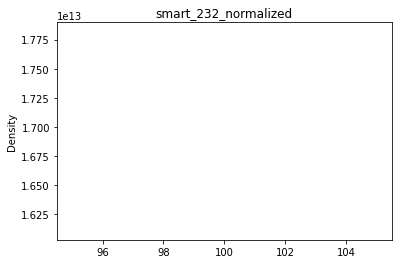

In [94]:
dataset.smart_232_normalized.plot.density(color='green')
plt.title('smart_232_normalized')

LinAlgError: singular matrix

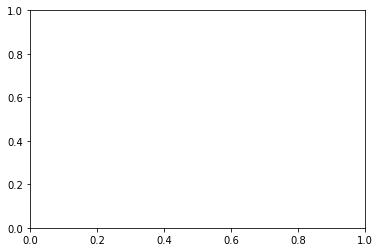

In [95]:
dataset.smart_233_normalized.plot.density(color='green')
plt.title('smart_233_normalized')

Text(0.5, 1.0, 'smart_235_normalized')

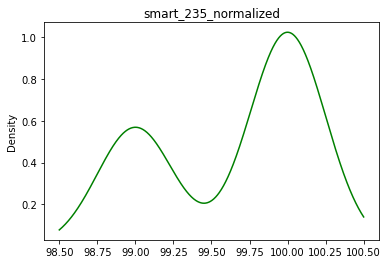

In [96]:
dataset.smart_235_normalized.plot.density(color='green')
plt.title('smart_235_normalized')

Text(0.5, 1.0, 'smart_240_normalized')

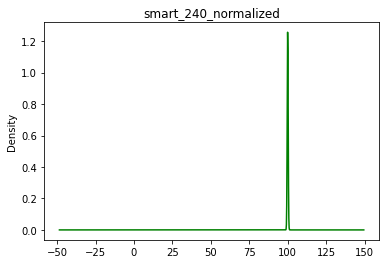

In [97]:
dataset.smart_240_normalized.plot.density(color='green')
plt.title('smart_240_normalized')

Text(0.5, 1.0, 'smart_241_normalized')

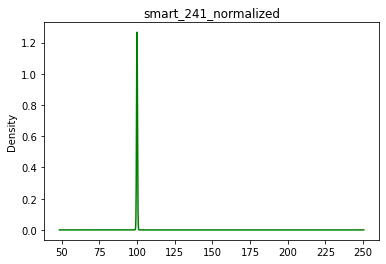

In [98]:
dataset.smart_241_normalized.plot.density(color='green')
plt.title('smart_241_normalized')

In [ ]:
dataset.smart_242_normalized.plot.density(color='green')
plt.title('smart_242_normalized')

In [ ]:
dataset.smart_245_normalized.plot.density(color='green')
plt.title('smart_245_normalized')

In [ ]:
dataset.smart_245_raw.plot.density(color='green')
plt.title('smart_245_raw')

In [ ]:
dataset.smart_247_normalized.plot.density(color='green')
plt.title('smart_247_normalized')

In [ ]:
dataset.smart_250_raw.plot.density(color='green')
plt.title('smart_250_raw')

In [ ]:
dataset.smart_252_normalized.plot.density(color='green')
plt.title('smart_252_normalized')

In [ ]:
dataset.normalized_capacity_bytes.plot.density(color='green')
plt.title('normalized_capacity_bytes')

In [ ]:
dataset.normalized_smart_1_raw.plot.density(color='green')
plt.title('normalized_smart_1_raw')

In [ ]:
dataset.normalized_smart_241_raw.plot.density(color='green')
plt.title('normalized_smart_241_raw')

In [ ]:
dataset.normalized_smart_242_raw.plot.density(color='green')
plt.title('normalized_smart_242_raw')

In [ ]:
dataset.normalized_smart_7_raw.plot.density(color='green')
plt.title('normalized_smart_7_raw')

In [ ]:
dataset.normalized_smart_9_raw.plot.density(color='green')
plt.title('normalized_smart_9_raw')

In [ ]:
dataset.normalized_smart_11_raw.plot.density(color='green')
plt.title('normalized_smart_11_raw')

In [ ]:
dataset.normalized_smart_173_raw.plot.density(color='green')
plt.title('normalized_smart_173_raw')

In [ ]:
dataset.normalized_smart_188_raw.plot.density(color='green')
plt.title('normalized_smart_188_raw')

In [ ]:
dataset.normalized_smart_193_raw.plot.density(color='green')
plt.title('normalized_smart_193_raw')

In [ ]:
dataset.normalized_smart_195_raw.plot.density(color='green')
plt.title('normalized_smart_195_raw')

In [ ]:
dataset.normalized_smart_225_raw.plot.density(color='green')
plt.title('normalized_smart_225_raw')

In [ ]:
dataset.normalized_smart_232_raw.plot.density(color='green')
plt.title('normalized_smart_232_raw')

In [ ]:
dataset.normalized_smart_233_raw.plot.density(color='green')
plt.title('normalized_smart_233_raw')

In [ ]:
dataset.normalized_smart_235_raw.plot.density(color='green')
plt.title('normalized_smart_235_raw')

In [ ]:
dataset.normalized_smart_240_raw.plot.density(color='green')
plt.title('normalized_smart_240_raw')

In [ ]:
dataset.normalized_smart_247_raw.plot.density(color='green')
plt.title('normalized_smart_247_raw')

In [ ]:
dataset.normalized_smart_251_raw.plot.density(color='green')
plt.title('normalized_smart_251_raw')

In [ ]:
dataset.normalized_smart_252_raw.plot.density(color='green')
plt.title('normalized_smart_252_raw')

In [ ]:
dataset.normalized_smart_5_raw.plot.density(color='green')
plt.title('normalized_smart_5_raw')

In [ ]:
dataset.normalized_smart_197_raw.plot.density(color='green')
plt.title('normalized_smart_197_raw')

In [ ]:
dataset.normalized_smart_10_raw.plot.density(color='green')
plt.title('normalized_smart_10_raw')

In [ ]:
dataset.normalized_smart_198_raw.plot.density(color='green')
plt.title('normalized_smart_198_raw')

In [28]:
## binning create new feature 
#bin_data = dataset[['smart_4_raw']]
dataset['smart_4_raw_1'] = pd.cut(dataset['smart_4_raw'], bins=[0, 6, 9, 25130], \
                                       labels=["ignore", "critical", "ignore1"])
dataset
dataset['smart_3_normalized_1'] = pd.cut(dataset['smart_3_normalized'], bins=[0, 80, 90, 250], \
                                       labels=["ignore", "critical", "ignore1"])
dataset

,rowno,modif_date,process_date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,...,smart_167_normalized,smart_167_raw,smart_169_normalized,smart_169_raw,smart_176_normalized,smart_176_raw,smart_178_normalized,smart_178_raw,smart_4_raw_1,smart_3_normalized_1
0,1,2021-12-08 23:53,2021-12-08 23:53:08.731,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2000398934016,0,100.0,0.0,135.0,...,None,None,None,None,None,None,None,None,ignore1,ignore1
1,1,2021-12-08 23:53,2021-12-08 23:53:09.383,Z1Y45RA5,ST3000NM0033-9ZM178,3000592982016,0,81.0,126329603.0,NaN,...,None,None,None,None,None,None,None,None,ignore1,ignore1
2,1,2021-12-08 23:53,2021-12-08 23:53:09.802,MK0271YGJA4WUA,Hitachi HUA723020ALA640,2000398934016,0,100.0,0.0,135.0,...,None,None,None,None,None,None,None,None,ignore1,ignore1
3,1,2021-12-09 00:00,2021-12-09 00:00:43.815,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2000398934016,0,100.0,0.0,135.0,...,None,None,None,None,None,None,None,None,ignore1,ignore1
4,1,2021-12-09 00:00,2021-12-09 00:00:44.477,Z1Y45RA5,ST3000NM0033-9ZM178,3000592982016,0,81.0,126329603.0,NaN,...,None,None,None,None,None,None,None,None,ignore1,ignore1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,2021-12-26 09:40,2021-12-26 09:40:44.649,S1Z24EE8,ST4000NM0033-9ZM170,4000787030016,0,81.0,162116421.0,NaN,...,None,None,None,None,None,None,None,None,ignore1,ignore1
6996,1,2021-12-26 09:40,2021-12-26 09:40:45.402,MK0331YHGDS9KA,Hitachi HUA723030ALA640,3000592982016,0,100.0,0.0,135.0,...,None,None,None,None,None,None,None,None,ignore1,ignore1
6997,1,2021-12-26 09:53,2021-12-26 09:53:08.655,CVPR223400LU040AGN,INTEL SSDSA2BT040G3,40020664320,0,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,NaN,ignore1
6998,1,2021-12-26 09:53,2021-12-26 09:53:09.142,3511K05DFTMB,TOSHIBA MG04ACA600E,6001175126016,0,100.0,0.0,100.0,...,None,None,None,None,None,None,None,None,ignore1,ignore1


In [13]:
## binning create new feature 
#bin_data = dataset[['smart_4_raw']]
dataset['new1'] = pd.cut(dataset['smart_4_raw'], bins=[6, 9], \
                                       labels=["critical"])

dataset['new2'] = pd.cut(dataset['smart_3_normalized'], bins=[90, 130], \
                                       labels=["critical"])
dataset['new3'] = pd.cut(dataset['smart_2_normalized'], bins=[0, 170], \
                                       labels=["critical"])
dataset

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,new1,new2,new3
0,2021-12-08,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2.000399e+12,0.0,100.0,0.0,135.0,84.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical
1,2021-12-08,Z1Y45RA5,ST3000NM0033-9ZM178,3.000593e+12,0.0,81.0,126329603.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,NaN
2,2021-12-08,MK0271YGJA4WUA,Hitachi HUA723020ALA640,2.000399e+12,0.0,100.0,0.0,135.0,84.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical
3,2021-12-08,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2.000399e+12,0.0,100.0,0.0,135.0,84.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical
4,2021-12-08,Z1Y45RA5,ST3000NM0033-9ZM178,3.000593e+12,0.0,81.0,126329603.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29483,2015-12-29,Z302AKTE,ST4000DM000,4.000787e+12,1.0,115.0,93890928.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,critical,NaN
29484,2015-12-29,Z3015LLW,ST4000DM000,4.000787e+12,1.0,120.0,241481608.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,NaN
29485,2015-12-29,W30062HL,ST4000DM000,4.000787e+12,1.0,117.0,153500184.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,NaN
29486,2015-12-29,W300J887,ST4000DM000,4.000787e+12,1.0,116.0,101796208.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,critical,NaN


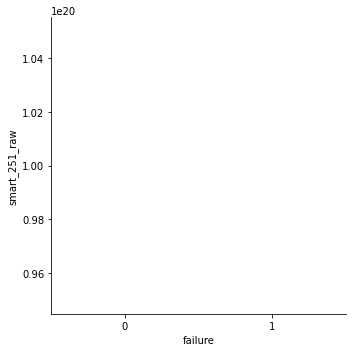

In [29]:
# univariyant analysis 
# https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="failure", y="smart_251_raw", data=dataset)

In [30]:
# SPLIT DATA IN TRAIN TEST VALIDAATION
import numpy as np
import pandas as pd

def train_validate_test_split(df, train_percent=.7, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

#np.random.seed([3,1415])
df = dataset
dataset = df
df_train, df_validate, df_test = train_validate_test_split(dataset)

In [31]:
# reference link : https://towardsdatascience.com/feature-
engineering-for-machine-learning-3a5e293a5114
# https://rubikscode.net/2021/06/29/top-9-feature-engineering-techniques/

#Filling missing values with medians of the columns
data = data.fillna(data.median())
# missing value treatment wth mean / mode
df_train['smart_1_normalized']=df_train['smart_1_normalized'].fillna(df_train['smart_1_normalized'].mean())
df_train['smart_1_normalized']

df_train['smart_1_normalized']=df_train['smart_1_normalized'].fillna(df_train['smart_1_normalized'].mode()[0])
df_train['smart_1_normalized']

#Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts()
.idxmax(), inplace=True)

###############

# missing value treatment wth Dropping columns or rows with missing value rate higher than threshold
threshold = 0.7

#Dropping rows with missing value rate higher than threshold
df_train = df_train.loc[df_train.isnull().mean(axis=1) < threshold]

#Dropping columns with missing value rate higher than threshold
df_train = df_train[df_train.columns[df_train.isnull().mean() < threshold]]


###########

#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['column'].mean () + data['column'].std () * factor
lower_lim = data['column'].mean () - data['column'].std () * factor

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

########
#Dropping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

#Capping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)
data.loc[(df[column] > upper_lim),column] = upper_lim
data.loc[(df[column] < lower_lim),column] = lower_lim

# one hot encoding
encoded_columns = pd.get_dummies(data['column'])
data = data.join(encoded_columns).drop('column', axis=1)

# normalize
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

# Standardization
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()


###### sum of missing value
print(df_train.isnull().sum())

### change data type 
data["sex"] = data["sex"].astype('category')
data.dtypes
#  Label Encoding
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
# One-Hot Encoding

encoded_sex = pd.get_dummies(categorical_data['sex'])
categorical_data = categorical_data.join(encoded_sex)
# Count Encoding
sex_count = categorical_data['sex'].value_counts()
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

# boxplot outliers
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")

## outlier removal usind std / The other way for detecting and removing outliers would by using standard deviation.
factor = 2
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

## outlier removal usind percentiles / The other way for detecting and removing outliers would by using percentiles.
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

## binning create new feature 
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], \ 
                                       labels=["Low", "Mid", "High"])
bin_data

### machine learning algorithms require that the distribution of our data is uniform or normal
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

# then do this 
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

## log trasfermation
log_data = data[['body_mass_g']]
log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)
log_data

SyntaxError: invalid syntax (<ipython-input-31-5542acc4ae3e>, line 2)

<AxesSubplot:xlabel='failure', ylabel='smart_3_normalized'>

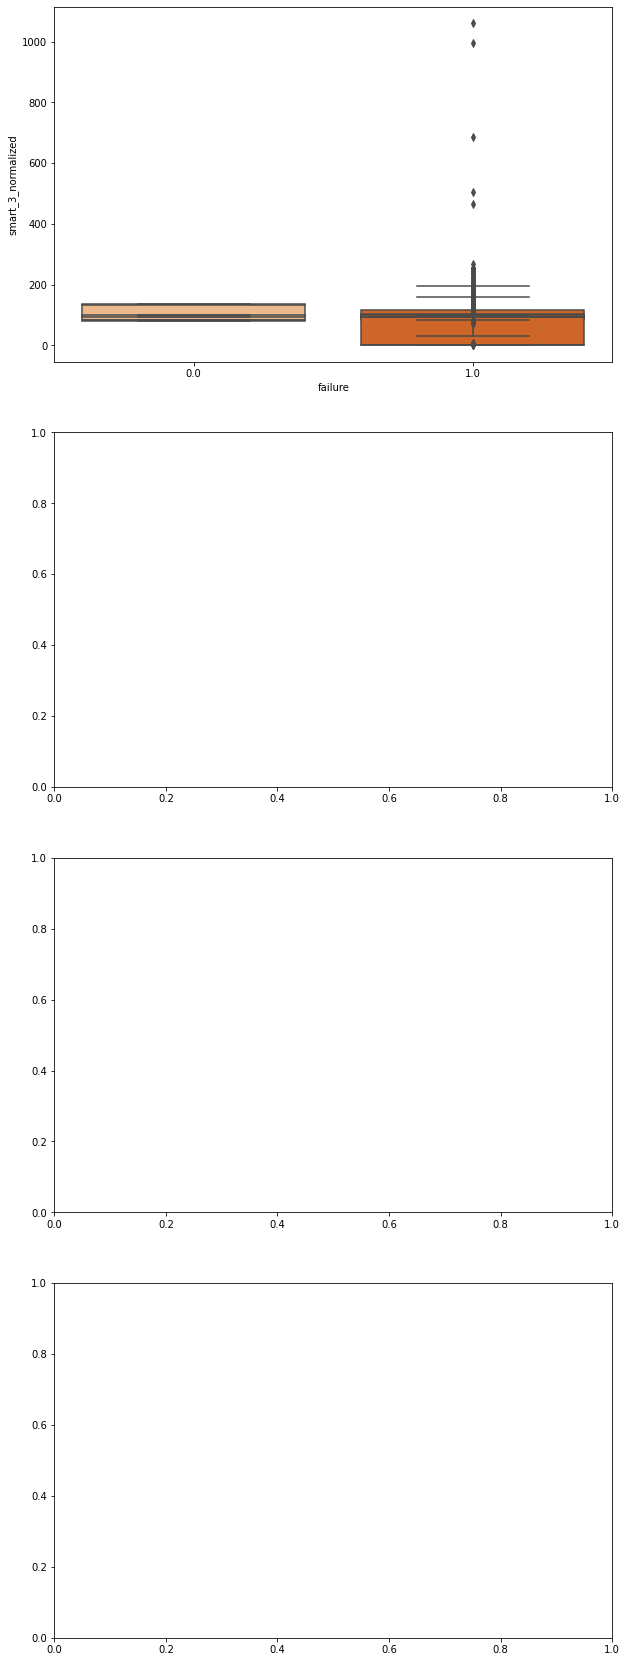

In [16]:
# boxplot outliers
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=dataset,y="smart_1_normalized",x="failure",orient="v",ax=axes[0], palette="Oranges")


<AxesSubplot:xlabel='failure', ylabel='smart_2_raw'>

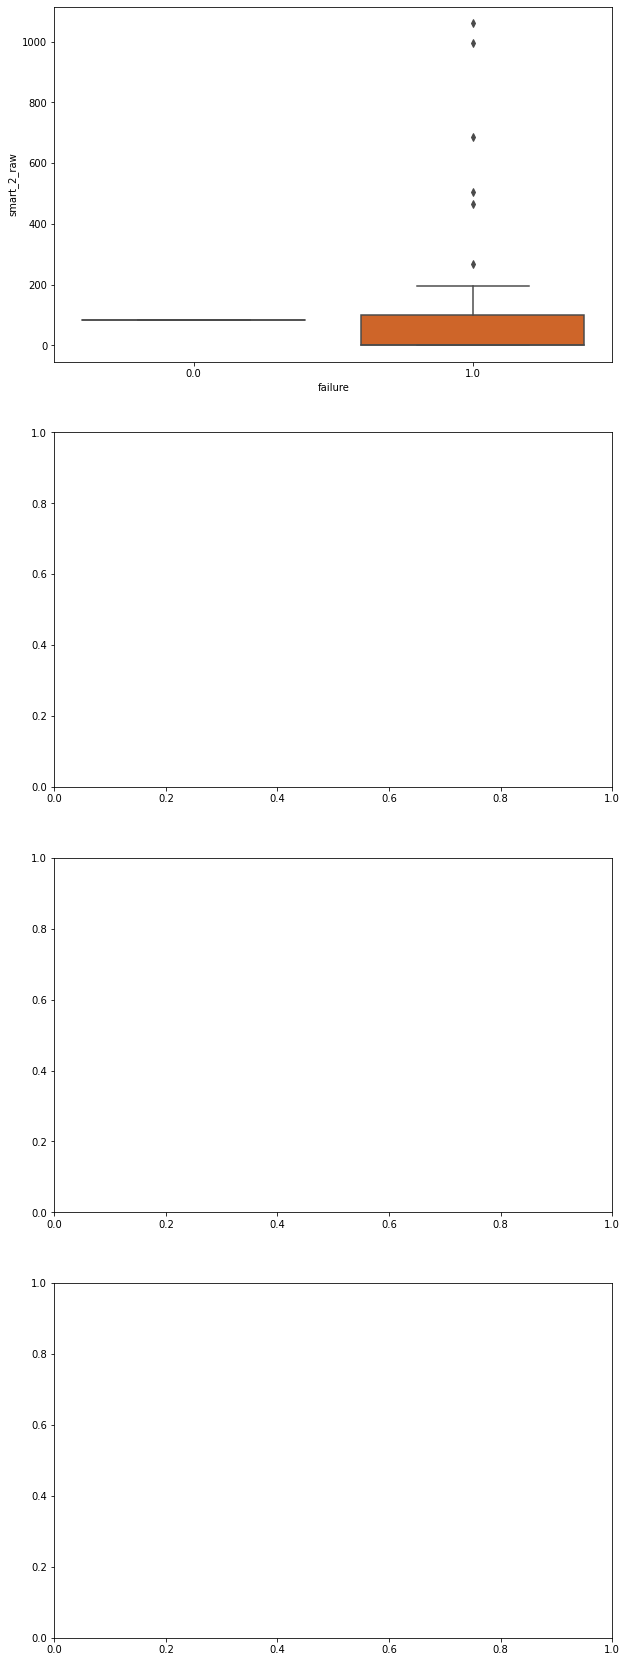

In [20]:
# boxplot outliers
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=dataset,y="smart_2_raw",x="failure",orient="v",ax=axes[0], palette="Oranges")
#sns.boxplot(data=dataset,y="smart_3_normalized",x="failure",orient="v",ax=axes[0], palette="Oranges")

In [16]:
# anomoly dedection
df_train.describe()
df_train["failure"].describe()
df_train.dtypes

NameError: name 'df_train' is not defined

In [6]:
# anomoly dedection
dataset.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.948800e+04,29488.000000,28487.000000,2.943700e+04,12444.000000,12444.000000,28457.000000,28457.000000,28457.000000,28457.000000,...,98.0,9.800000e+01,98.0,9.800000e+01,98.000000,9.800000e+01,177.000000,177.0,1.0,1.0
mean,-2.609019e+14,0.474634,97.991996,2.956256e+08,133.785358,77.365959,110.504234,376.030854,99.633728,2235.284253,...,1.0,8.633758e+07,1.0,1.666025e+08,7.061224,7.635527e+07,102.259887,0.0,120.0,276664.0
std,5.332000e+16,0.499365,19.381205,3.865189e+10,18.007682,29.956988,21.707165,1044.956413,0.522119,2686.095506,...,0.0,7.331620e+07,0.0,1.453043e+08,23.856451,6.668912e+07,14.904248,0.0,NaN,NaN
min,-9.116023e+18,0.000000,1.000000,0.000000e+00,86.000000,0.000000,71.000000,0.000000,74.000000,1.000000,...,1.0,8.223300e+04,1.0,3.663700e+04,1.000000,0.000000e+00,100.000000,0.0,120.0,276664.0
25%,2.000399e+12,0.000000,81.000000,0.000000e+00,135.000000,84.000000,93.000000,0.000000,99.000000,10.000000,...,1.0,1.669143e+07,1.0,2.498315e+07,1.000000,1.129506e+07,100.000000,0.0,120.0,276664.0
50%,3.000593e+12,0.000000,100.000000,3.375798e+07,135.000000,84.000000,98.000000,0.000000,100.000000,1634.000000,...,1.0,6.094586e+07,1.0,1.210925e+08,1.000000,5.536197e+07,100.000000,0.0,120.0,276664.0
75%,4.000787e+12,1.000000,100.000000,1.263296e+08,135.000000,85.000000,134.000000,460.000000,100.000000,3320.000000,...,1.0,1.682386e+08,1.0,3.300566e+08,1.000000,1.502876e+08,100.000000,0.0,120.0,276664.0
max,6.003326e+17,1.000000,200.000000,6.631634e+12,252.000000,1061.000000,253.000000,10891.000000,100.000000,26675.000000,...,1.0,2.003252e+08,1.0,3.895173e+08,100.000000,1.786998e+08,200.000000,0.0,120.0,276664.0


In [22]:
# count the data eda

df_train['serial_number'].value_counts()

MK0271YGJP8LVA    3645
Z1Y45RA5          3605
MK0271YGJA4WUA    3584
S1F02PL9             3
S1F018ZS             3
                  ... 
ZHZ4P9Y0             1
Z3016S57             1
ZA16DQ0L             1
ZA11R2DJ             1
W300R7AN             1
Name: serial_number, Length: 9778, dtype: int64

In [17]:
# one hot encoding for all the catogorical data 
one_hot_encoded_data = pd.get_dummies(df_train, columns = ['model'])
one_hot_encoded_data

NameError: name 'df_train' is not defined

In [24]:
# split data in to 20 percentage tand 80 percentage
train, test = train_test_split(df_train, test_size=0.2)


In [25]:
# anomoly detection refrence link: https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

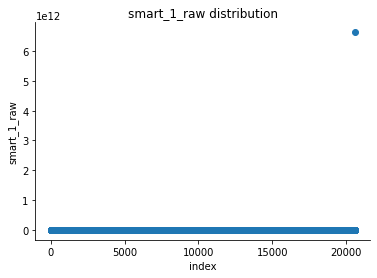

In [26]:
# scatter plot
plt.scatter(range(df_train.shape[0]), np.sort(df_train['smart_1_raw'].values))
plt.xlabel('index')
plt.ylabel('smart_1_raw')
plt.title("smart_1_raw distribution")
sns.despine()

/home/smicro/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


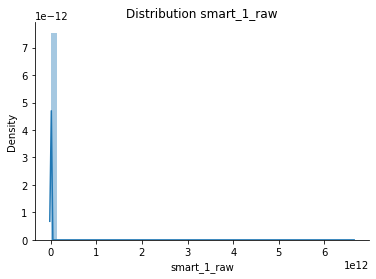

In [27]:
# distplot important 
sns.distplot(df_train['smart_1_raw'])
plt.title("Distribution smart_1_raw")
sns.despine()

In [28]:
# Skewness  Kurtosis
# skewness & Kurtosis for normal distribution will be 0
#  kurtosis between -2 and +2 are considered acceptable
# kurtosis is between ‐7 to +7 are considered acceptable
print("Skewness: %f" % df_train['smart_1_raw'].skew())
print("Kurtosis: %f" % df_train['smart_1_raw'].kurt())

Skewness: 143.543295
Kurtosis: 20604.785032


In [ ]:
# skewness in data
df_train['smart_1_normalized'].skew()

In [ ]:
df_train

In [ ]:
# remove the skewness 1st methord
df_train.smart_1_normalized=np.log(df_train['smart_1_normalized'])


In [ ]:
# remove the skewness 2nd  methord
df_train.smart_1_normalized=stats.boxcox(df_train['smart_1_normalized'])[0]


In [ ]:
# remove the skewness 3d  methord
df_train.smart_1_normalized=np.sqrt(df_train['smart_1_normalized'])


In [ ]:
# scatter
plt.scatter(range(df_train.shape[0]), np.sort(df_train['smart_1_raw'].values))
plt.xlabel('index')
plt.ylabel('smart_1_raw')
plt.title("smart_1_raw distribution")
sns.despine()

In [ ]:
df_train

/home/smicro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


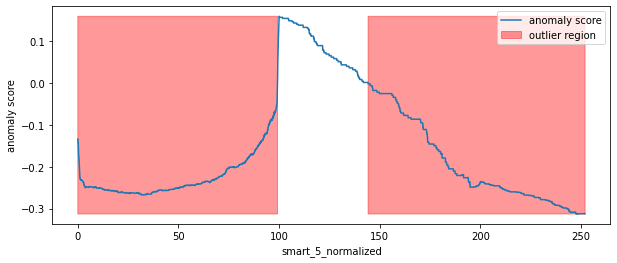

In [31]:
# anomaly score
df_train['smart_5_normalized'] = df_train['smart_5_normalized'].fillna(0)
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_train['smart_5_normalized'].values.reshape(-1, 1))
xx = np.linspace(df_train['smart_5_normalized'].min(), df_train['smart_5_normalized'].max(), len(df_train)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('smart_5_normalized')
plt.show();

In [ ]:
# find anomoly
df_train.iloc[10]
#df_train.iloc[3]
df_train.iloc[1]

In [ ]:
# describe commands 
df_train['model'].describe()

In [ ]:
# distplot commands 
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [ ]:
dataset

In [ ]:
# density plot graph
dataset.smart_2_normalized.plot.density(color='green')
plt.title('Density plot for smart')
plt.show()

In [ ]:
plt.title('Density plot for smart')
plt.show()

In [ ]:
# scatter plot graph

plt.scatter(df_train.index,df_train['smart_1_raw'])

In [ ]:
#bar plot for data bias , y varirable
# define the y variyable 
target = 'failure'   #defining a global variable
# read data
df_train = pd.read_csv('E:/work/Supermicro/modeling/data_Q2_2019/2019-06-03.csv')
df_test = pd.read_csv('E:/work/Supermicro/modeling/data_Q2_2019/2019-06-17.csv')

sns.countplot(df_train['failure'])

In [ ]:
# multivariyant analysis
sns.regplot(x="failure", y="smart_1_normalized", data=df_train)
sns.despine();

In [ ]:
# MISSING VALUE TREATMENT
# missing value 
#df_train.isnull().sum()
total = df_train.isnull().sum().sort_values(ascending=False)
total

In [ ]:
# discriptve analysis
df_test.shape

In [ ]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent

In [ ]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)
type(missing_data)

In [ ]:
# download missing data in csv file 
vif_data.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\vif_data.csv')

In [ ]:
# replace all NA's with 0
df_train.fillna(0)# replace all NA's with 0
df_train.fillna(0)

In [ ]:
# fill missing data with perticular value 
df_train['smart_187_raw'] = df_train['smart_187_raw'].fillna(12)

In [ ]:
# outliers / outlyers treatment - replace with any single value 
df_train.loc[df_train['smart_1_normalized'] == 200, 'smart_1_normalized'] = 10

In [ ]:
# outliers / outlyers treatment - replace with any single value 
def remove_outlier(df_train, smart_1_normalized):
    q1 = df_train[smart_1_normalized].quantile(0.25)
    q3 = df_train[smart_1_normalized].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [34]:
# corrilation matrix example 
corrilation_matrix=dataset.corr()
# take a print for # corrilation matrix example 
corrilation_matrix.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\corrilation_matrix.csv')

In [ ]:
# plot the corrilation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corrilation_matrix, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

Text(0.5, 1.0, 'Correlation between different fearures')

In [ ]:
# refrence link: https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/

In [ ]:
# box plot to treat outliers
sns.boxplot(x=df_train['capacity_bytes'])

In [ ]:
# box plot with catogory and numeric variyable outliers treatment 
df_train.boxplot(by ='failure', column =['smart_1_normalized'], grid = False)

In [ ]:
# horizondal box plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df_train,x=df_train["smart_1_normalized"])
plt.title("Boxplot of Swiss Banknote Length ")

In [ ]:
df_train

In [ ]:
# create histograms on all features
df_train = df_train.drop(['smart_1_normalized'], 1)
df_train.hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()

In [ ]:
# Plot istribution of the Time variable, which contains transaction data for two days
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)
plt.figure(figsize=(20,4))
fig = sns.displot(df_train['smart_1_raw'], kde=False, color="c", height=4, aspect=11.7/4.27)
plt.show()

In [ ]:
# Plot time against amount # how 3 variyable are behavoing
x = df_train['smart_1_raw']
y = df_train['smart_3_normalized']
rp = sns.relplot(data=df_train, x=x, y=y, col="failure", kind="scatter", hue="failure")
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Transaction Amount over Time split by Class')

In [ ]:
# bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(train.failure,train.smart_1_normalized)
plt.show()

In [ ]:
# univariyant analysis 
# refrence link: https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="failure", y="smart_1_normalized", data=train)

In [ ]:
train

In [ ]:
# see the all thecode in EDA In excel

In [ ]:
df_train

In [ ]:
# bar plot
df_train['capacity_bytes'].plot(kind = 'bar')

In [ ]:
# apply normalization techniques on Column 1
# copy the data
df_max_scaled = df_train.copy()
column = 'capacity_bytes'
df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
  
# view normalized data
display(df_max_scaled)

In [ ]:
# apply normalization techniques on 2 and more colums
# copy the data
df_max_scaled = df_train.copy()
column = 'smart_1_raw'
column1= 'capacity_bytes'
df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
df_max_scaled[column1] = df_max_scaled[column1] /df_max_scaled[column1].abs().max()
 
# view normalized data
display(df_max_scaled)

In [ ]:
df_train['capacity_bytes']

In [ ]:
# Import label encoder for nominal variyable 
# Import libraries 
import numpy as np
import pandas as pd
 

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_train['capacity_bytes']= label_encoder.fit_transform(df_train['capacity_bytes'])
df_train['capacity_bytes'].unique()
# Encode labels in column 'species'.
df_train['serial_number']= label_encoder.fit_transform(df_train['serial_number'])
df_train['serial_number'].unique()

In [ ]:
# find all the catogorical variyable in source data 
# checking features
cat = df_train.select_dtypes(include='O').keys()
# display variabels
cat

In [ ]:
# EDA / ANOMOLY MORE USEFULL  unique values in each columns
# unique values in each columns
for x in df_train.columns:
    #prinfting unique values
    print(x ,':', len(df_train[x].unique()))

In [ ]:
# eda / anomoly finding the top 20 categories 
# refrence link: https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/
df_train.model.value_counts().sort_values(ascending=False).head(20)

In [ ]:
df_train

In [ ]:
df_train

In [ ]:
# creating dummies for gender or two catgorical variyable 
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
df_train['model'] = df_train['model'].map({'ST12000NM0007':0, 'ST8000DM002':1})

In [18]:
dataset['smart_255_raw']=dataset['smart_255_raw'].fillna(dataset['smart_255_raw'].mean())
dataset['smart_15_normalized']=dataset['smart_15_normalized'].fillna(dataset['smart_15_normalized'].mean())
dataset['smart_255_normalized']=dataset['smart_255_normalized'].fillna(dataset['smart_255_normalized'].mean())
dataset['smart_252_raw']=dataset['smart_252_raw'].fillna(dataset['smart_252_raw'].mean())
dataset['smart_252_normalized']=dataset['smart_252_normalized'].fillna(dataset['smart_252_normalized'].mean())
dataset['smart_251_raw']=dataset['smart_251_raw'].fillna(dataset['smart_251_raw'].mean())
dataset['smart_251_normalized']=dataset['smart_251_normalized'].fillna(dataset['smart_251_normalized'].mean())
dataset['smart_250_raw']=dataset['smart_250_raw'].fillna(dataset['smart_250_raw'].mean())
dataset['smart_250_normalized']=dataset['smart_250_normalized'].fillna(dataset['smart_250_normalized'].mean())
dataset['smart_15_raw']=dataset['smart_15_raw'].fillna(dataset['smart_15_raw'].mean())
dataset['smart_234_normalized']=dataset['smart_234_normalized'].fillna(dataset['smart_234_normalized'].mean())
dataset['smart_234_raw']=dataset['smart_234_raw'].fillna(dataset['smart_234_raw'].mean())
dataset['smart_206_normalized']=dataset['smart_206_normalized'].fillna(dataset['smart_206_normalized'].mean())
dataset['smart_206_raw']=dataset['smart_206_raw'].fillna(dataset['smart_206_raw'].mean())
dataset['smart_210_raw']=dataset['smart_210_raw'].fillna(dataset['smart_210_raw'].mean())
dataset['smart_210_normalized']=dataset['smart_210_normalized'].fillna(dataset['smart_210_normalized'].mean())
dataset['smart_248_raw']=dataset['smart_248_raw'].fillna(dataset['smart_248_raw'].mean())
dataset['smart_248_normalized']=dataset['smart_248_normalized'].fillna(dataset['smart_248_normalized'].mean())
dataset['smart_247_normalized']=dataset['smart_247_normalized'].fillna(dataset['smart_247_normalized'].mean())
dataset['smart_247_raw']=dataset['smart_247_raw'].fillna(dataset['smart_247_raw'].mean())
dataset['smart_166_normalized']=dataset['smart_166_normalized'].fillna(dataset['smart_166_normalized'].mean())
dataset['smart_178_raw']=dataset['smart_178_raw'].fillna(dataset['smart_178_raw'].mean())
dataset['smart_160_normalized']=dataset['smart_160_normalized'].fillna(dataset['smart_160_normalized'].mean())
dataset['smart_161_normalized']=dataset['smart_161_normalized'].fillna(dataset['smart_161_normalized'].mean())
dataset['smart_161_raw']=dataset['smart_161_raw'].fillna(dataset['smart_161_raw'].mean())
dataset['smart_163_normalized']=dataset['smart_163_normalized'].fillna(dataset['smart_163_normalized'].mean())
dataset['smart_163_raw']=dataset['smart_163_raw'].fillna(dataset['smart_163_raw'].mean())
dataset['smart_164_normalized']=dataset['smart_164_normalized'].fillna(dataset['smart_164_normalized'].mean())
dataset['smart_164_raw']=dataset['smart_164_raw'].fillna(dataset['smart_164_raw'].mean())
dataset['smart_165_normalized']=dataset['smart_165_normalized'].fillna(dataset['smart_165_normalized'].mean())
dataset['smart_165_raw']=dataset['smart_165_raw'].fillna(dataset['smart_165_raw'].mean())
dataset['smart_160_raw']=dataset['smart_160_raw'].fillna(dataset['smart_160_raw'].mean())
dataset['smart_176_raw']=dataset['smart_176_raw'].fillna(dataset['smart_176_raw'].mean())
dataset['smart_176_normalized']=dataset['smart_176_normalized'].fillna(dataset['smart_176_normalized'].mean())
dataset['smart_178_normalized']=dataset['smart_178_normalized'].fillna(dataset['smart_178_normalized'].mean())
dataset['smart_167_normalized']=dataset['smart_167_normalized'].fillna(dataset['smart_167_normalized'].mean())
dataset['smart_166_raw']=dataset['smart_166_raw'].fillna(dataset['smart_166_raw'].mean())
dataset['smart_169_raw']=dataset['smart_169_raw'].fillna(dataset['smart_169_raw'].mean())
dataset['smart_169_normalized']=dataset['smart_169_normalized'].fillna(dataset['smart_169_normalized'].mean())
dataset['smart_167_raw']=dataset['smart_167_raw'].fillna(dataset['smart_167_raw'].mean())
dataset['smart_175_normalized']=dataset['smart_175_normalized'].fillna(dataset['smart_175_normalized'].mean())
dataset['smart_175_raw']=dataset['smart_175_raw'].fillna(dataset['smart_175_raw'].mean())
dataset['smart_180_raw']=dataset['smart_180_raw'].fillna(dataset['smart_180_raw'].mean())
dataset['smart_201_normalized']=dataset['smart_201_normalized'].fillna(dataset['smart_201_normalized'].mean())
dataset['smart_201_raw']=dataset['smart_201_raw'].fillna(dataset['smart_201_raw'].mean())
dataset['smart_202_normalized']=dataset['smart_202_normalized'].fillna(dataset['smart_202_normalized'].mean())
dataset['smart_180_normalized']=dataset['smart_180_normalized'].fillna(dataset['smart_180_normalized'].mean())
dataset['smart_179_raw']=dataset['smart_179_raw'].fillna(dataset['smart_179_raw'].mean())
dataset['smart_202_raw']=dataset['smart_202_raw'].fillna(dataset['smart_202_raw'].mean())
dataset['smart_179_normalized']=dataset['smart_179_normalized'].fillna(dataset['smart_179_normalized'].mean())
dataset['smart_13_normalized']=dataset['smart_13_normalized'].fillna(dataset['smart_13_normalized'].mean())
dataset['smart_13_raw']=dataset['smart_13_raw'].fillna(dataset['smart_13_raw'].mean())
dataset['smart_170_normalized']=dataset['smart_170_normalized'].fillna(dataset['smart_170_normalized'].mean())
dataset['smart_17_normalized']=dataset['smart_17_normalized'].fillna(dataset['smart_17_normalized'].mean())
dataset['smart_170_raw']=dataset['smart_170_raw'].fillna(dataset['smart_170_raw'].mean())
dataset['smart_218_normalized']=dataset['smart_218_normalized'].fillna(dataset['smart_218_normalized'].mean())
dataset['smart_231_raw']=dataset['smart_231_raw'].fillna(dataset['smart_231_raw'].mean())
dataset['smart_231_normalized']=dataset['smart_231_normalized'].fillna(dataset['smart_231_normalized'].mean())
dataset['smart_16_raw']=dataset['smart_16_raw'].fillna(dataset['smart_16_raw'].mean())
dataset['smart_245_raw']=dataset['smart_245_raw'].fillna(dataset['smart_245_raw'].mean())
dataset['smart_16_normalized']=dataset['smart_16_normalized'].fillna(dataset['smart_16_normalized'].mean())
dataset['smart_17_raw']=dataset['smart_17_raw'].fillna(dataset['smart_17_raw'].mean())
dataset['smart_245_normalized']=dataset['smart_245_normalized'].fillna(dataset['smart_245_normalized'].mean())
dataset['smart_182_normalized']=dataset['smart_182_normalized'].fillna(dataset['smart_182_normalized'].mean())
dataset['smart_181_raw']=dataset['smart_181_raw'].fillna(dataset['smart_181_raw'].mean())
dataset['smart_181_normalized']=dataset['smart_181_normalized'].fillna(dataset['smart_181_normalized'].mean())
dataset['smart_218_raw']=dataset['smart_218_raw'].fillna(dataset['smart_218_raw'].mean())
dataset['smart_182_raw']=dataset['smart_182_raw'].fillna(dataset['smart_182_raw'].mean())
dataset['smart_174_raw']=dataset['smart_174_raw'].fillna(dataset['smart_174_raw'].mean())
dataset['smart_174_normalized']=dataset['smart_174_normalized'].fillna(dataset['smart_174_normalized'].mean())
dataset['smart_173_raw']=dataset['smart_173_raw'].fillna(dataset['smart_173_raw'].mean())
dataset['smart_173_normalized']=dataset['smart_173_normalized'].fillna(dataset['smart_173_normalized'].mean())
dataset['smart_235_normalized']=dataset['smart_235_normalized'].fillna(dataset['smart_235_normalized'].mean())
dataset['smart_235_raw']=dataset['smart_235_raw'].fillna(dataset['smart_235_raw'].mean())
dataset['smart_232_normalized']=dataset['smart_232_normalized'].fillna(dataset['smart_232_normalized'].mean())
dataset['smart_168_raw']=dataset['smart_168_raw'].fillna(dataset['smart_168_raw'].mean())
dataset['smart_168_normalized']=dataset['smart_168_normalized'].fillna(dataset['smart_168_normalized'].mean())
dataset['smart_177_raw']=dataset['smart_177_raw'].fillna(dataset['smart_177_raw'].mean())
dataset['smart_177_normalized']=dataset['smart_177_normalized'].fillna(dataset['smart_177_normalized'].mean())
dataset['smart_232_raw']=dataset['smart_232_raw'].fillna(dataset['smart_232_raw'].mean())
dataset['smart_254_raw']=dataset['smart_254_raw'].fillna(dataset['smart_254_raw'].mean())
dataset['smart_254_normalized']=dataset['smart_254_normalized'].fillna(dataset['smart_254_normalized'].mean())
dataset['smart_233_raw']=dataset['smart_233_raw'].fillna(dataset['smart_233_raw'].mean())
dataset['smart_233_normalized']=dataset['smart_233_normalized'].fillna(dataset['smart_233_normalized'].mean())
dataset['smart_225_raw']=dataset['smart_225_raw'].fillna(dataset['smart_225_raw'].mean())
dataset['smart_225_normalized']=dataset['smart_225_normalized'].fillna(dataset['smart_225_normalized'].mean())
dataset['smart_11_raw']=dataset['smart_11_raw'].fillna(dataset['smart_11_raw'].mean())
dataset['smart_11_normalized']=dataset['smart_11_normalized'].fillna(dataset['smart_11_normalized'].mean())
dataset['smart_22_normalized']=dataset['smart_22_normalized'].fillna(dataset['smart_22_normalized'].mean())
dataset['smart_22_raw']=dataset['smart_22_raw'].fillna(dataset['smart_22_raw'].mean())
dataset['smart_23_normalized']=dataset['smart_23_normalized'].fillna(dataset['smart_23_normalized'].mean())
dataset['smart_23_raw']=dataset['smart_23_raw'].fillna(dataset['smart_23_raw'].mean())
dataset['smart_24_normalized']=dataset['smart_24_normalized'].fillna(dataset['smart_24_normalized'].mean())
dataset['smart_24_raw']=dataset['smart_24_raw'].fillna(dataset['smart_24_raw'].mean())
dataset['smart_183_raw']=dataset['smart_183_raw'].fillna(dataset['smart_183_raw'].mean())
dataset['smart_183_normalized']=dataset['smart_183_normalized'].fillna(dataset['smart_183_normalized'].mean())
dataset['smart_220_normalized']=dataset['smart_220_normalized'].fillna(dataset['smart_220_normalized'].mean())
dataset['smart_226_raw']=dataset['smart_226_raw'].fillna(dataset['smart_226_raw'].mean())
dataset['smart_226_normalized']=dataset['smart_226_normalized'].fillna(dataset['smart_226_normalized'].mean())
dataset['smart_224_raw']=dataset['smart_224_raw'].fillna(dataset['smart_224_raw'].mean())
dataset['smart_224_normalized']=dataset['smart_224_normalized'].fillna(dataset['smart_224_normalized'].mean())
dataset['smart_222_raw']=dataset['smart_222_raw'].fillna(dataset['smart_222_raw'].mean())
dataset['smart_222_normalized']=dataset['smart_222_normalized'].fillna(dataset['smart_222_normalized'].mean())
dataset['smart_220_raw']=dataset['smart_220_raw'].fillna(dataset['smart_220_raw'].mean())
dataset['smart_18_normalized']=dataset['smart_18_normalized'].fillna(dataset['smart_18_normalized'].mean())
dataset['smart_18_raw']=dataset['smart_18_raw'].fillna(dataset['smart_18_raw'].mean())
dataset['smart_223_raw']=dataset['smart_223_raw'].fillna(dataset['smart_223_raw'].mean())
dataset['smart_223_normalized']=dataset['smart_223_normalized'].fillna(dataset['smart_223_normalized'].mean())
dataset['smart_200_raw']=dataset['smart_200_raw'].fillna(dataset['smart_200_raw'].mean())
dataset['smart_200_normalized']=dataset['smart_200_normalized'].fillna(dataset['smart_200_normalized'].mean())
dataset['smart_242_raw']=dataset['smart_242_raw'].fillna(dataset['smart_242_raw'].mean())
dataset['smart_242_normalized']=dataset['smart_242_normalized'].fillna(dataset['smart_242_normalized'].mean())
dataset['smart_241_raw']=dataset['smart_241_raw'].fillna(dataset['smart_241_raw'].mean())
dataset['smart_241_normalized']=dataset['smart_241_normalized'].fillna(dataset['smart_241_normalized'].mean())
dataset['smart_240_raw']=dataset['smart_240_raw'].fillna(dataset['smart_240_raw'].mean())
dataset['smart_240_normalized']=dataset['smart_240_normalized'].fillna(dataset['smart_240_normalized'].mean())
dataset['smart_189_raw']=dataset['smart_189_raw'].fillna(dataset['smart_189_raw'].mean())
dataset['smart_189_normalized']=dataset['smart_189_normalized'].fillna(dataset['smart_189_normalized'].mean())
dataset['smart_184_raw']=dataset['smart_184_raw'].fillna(dataset['smart_184_raw'].mean())
dataset['smart_184_normalized']=dataset['smart_184_normalized'].fillna(dataset['smart_184_normalized'].mean())
dataset['smart_195_raw']=dataset['smart_195_raw'].fillna(dataset['smart_195_raw'].mean())
dataset['smart_195_normalized']=dataset['smart_195_normalized'].fillna(dataset['smart_195_normalized'].mean())
dataset['smart_191_raw']=dataset['smart_191_raw'].fillna(dataset['smart_191_raw'].mean())
dataset['smart_191_normalized']=dataset['smart_191_normalized'].fillna(dataset['smart_191_normalized'].mean())
dataset['smart_190_raw']=dataset['smart_190_raw'].fillna(dataset['smart_190_raw'].mean())
dataset['smart_190_normalized']=dataset['smart_190_normalized'].fillna(dataset['smart_190_normalized'].mean())
dataset['smart_187_normalized']=dataset['smart_187_normalized'].fillna(dataset['smart_187_normalized'].mean())
dataset['smart_187_raw']=dataset['smart_187_raw'].fillna(dataset['smart_187_raw'].mean())
dataset['smart_188_normalized']=dataset['smart_188_normalized'].fillna(dataset['smart_188_normalized'].mean())
dataset['smart_188_raw']=dataset['smart_188_raw'].fillna(dataset['smart_188_raw'].mean())
dataset['smart_8_normalized']=dataset['smart_8_normalized'].fillna(dataset['smart_8_normalized'].mean())
dataset['smart_2_normalized']=dataset['smart_2_normalized'].fillna(dataset['smart_2_normalized'].mean())
dataset['smart_2_raw']=dataset['smart_2_raw'].fillna(dataset['smart_2_raw'].mean())
dataset['smart_8_raw']=dataset['smart_8_raw'].fillna(dataset['smart_8_raw'].mean())
dataset['smart_196_normalized']=dataset['smart_196_normalized'].fillna(dataset['smart_196_normalized'].mean())
dataset['smart_196_raw']=dataset['smart_196_raw'].fillna(dataset['smart_196_raw'].mean())
dataset['smart_193_raw']=dataset['smart_193_raw'].fillna(dataset['smart_193_raw'].mean())
dataset['smart_193_normalized']=dataset['smart_193_normalized'].fillna(dataset['smart_193_normalized'].mean())
dataset['smart_197_normalized']=dataset['smart_197_normalized'].fillna(dataset['smart_197_normalized'].mean())
dataset['smart_197_raw']=dataset['smart_197_raw'].fillna(dataset['smart_197_raw'].mean())
dataset['smart_3_normalized']=dataset['smart_3_normalized'].fillna(dataset['smart_3_normalized'].mean())
dataset['smart_3_raw']=dataset['smart_3_raw'].fillna(dataset['smart_3_raw'].mean())
dataset['smart_4_normalized']=dataset['smart_4_normalized'].fillna(dataset['smart_4_normalized'].mean())
dataset['smart_4_raw']=dataset['smart_4_raw'].fillna(dataset['smart_4_raw'].mean())
dataset['smart_7_normalized']=dataset['smart_7_normalized'].fillna(dataset['smart_7_normalized'].mean())
dataset['smart_10_normalized']=dataset['smart_10_normalized'].fillna(dataset['smart_10_normalized'].mean())
dataset['smart_7_raw']=dataset['smart_7_raw'].fillna(dataset['smart_7_raw'].mean())
dataset['smart_10_raw']=dataset['smart_10_raw'].fillna(dataset['smart_10_raw'].mean())
dataset['smart_5_normalized']=dataset['smart_5_normalized'].fillna(dataset['smart_5_normalized'].mean())
dataset['smart_5_raw']=dataset['smart_5_raw'].fillna(dataset['smart_5_raw'].mean())
dataset['smart_199_raw']=dataset['smart_199_raw'].fillna(dataset['smart_199_raw'].mean())
dataset['smart_198_normalized']=dataset['smart_198_normalized'].fillna(dataset['smart_198_normalized'].mean())
dataset['smart_199_normalized']=dataset['smart_199_normalized'].fillna(dataset['smart_199_normalized'].mean())
dataset['smart_198_raw']=dataset['smart_198_raw'].fillna(dataset['smart_198_raw'].mean())
dataset['smart_192_normalized']=dataset['smart_192_normalized'].fillna(dataset['smart_192_normalized'].mean())
dataset['smart_192_raw']=dataset['smart_192_raw'].fillna(dataset['smart_192_raw'].mean())
dataset['smart_9_raw']=dataset['smart_9_raw'].fillna(dataset['smart_9_raw'].mean())
dataset['smart_1_normalized']=dataset['smart_1_normalized'].fillna(dataset['smart_1_normalized'].mean())
dataset['smart_1_raw']=dataset['smart_1_raw'].fillna(dataset['smart_1_raw'].mean())
dataset['smart_9_normalized']=dataset['smart_9_normalized'].fillna(dataset['smart_9_normalized'].mean())
dataset['smart_194_raw']=dataset['smart_194_raw'].fillna(dataset['smart_194_raw'].mean())
dataset['smart_194_normalized']=dataset['smart_194_normalized'].fillna(dataset['smart_194_normalized'].mean())
dataset['smart_12_raw']=dataset['smart_12_raw'].fillna(dataset['smart_12_raw'].mean())
dataset['smart_12_normalized']=dataset['smart_12_normalized'].fillna(dataset['smart_12_normalized'].mean())
#dataset['failure']=dataset['failure'].fillna(dataset['failure'].mean())
#dataset['capacity_bytes']=dataset['capacity_bytes'].fillna(dataset['capacity_bytes'].mean())
#dataset['model']=dataset['model'].fillna(dataset['model'].mean())
#dataset['serial_number']=dataset['serial_number'].fillna(dataset['serial_number'].mean())
#dataset['date']=dataset['date'].fillna(dataset['date'].mean())


In [19]:
dataset

,rowno,modif_date,process_date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,...,smart_166_normalized,smart_166_raw,smart_167_normalized,smart_167_raw,smart_169_normalized,smart_169_raw,smart_176_normalized,smart_176_raw,smart_178_normalized,smart_178_raw
0,1,2021-12-08 23:53,2021-12-08 23:53:08.731,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2000398934016,0,100.000000,0.000000e+00,135.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-12-08 23:53,2021-12-08 23:53:09.383,Z1Y45RA5,ST3000NM0033-9ZM178,3000592982016,0,81.000000,1.263296e+08,132.680789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-12-08 23:53,2021-12-08 23:53:09.802,MK0271YGJA4WUA,Hitachi HUA723020ALA640,2000398934016,0,100.000000,0.000000e+00,135.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-12-09 00:00,2021-12-09 00:00:43.815,MK0271YGJP8LVA,Hitachi HUA723020ALA640,2000398934016,0,100.000000,0.000000e+00,135.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-12-09 00:00,2021-12-09 00:00:44.477,Z1Y45RA5,ST3000NM0033-9ZM178,3000592982016,0,81.000000,1.263296e+08,132.680789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,2021-12-26 09:40,2021-12-26 09:40:44.649,S1Z24EE8,ST4000NM0033-9ZM170,4000787030016,0,81.000000,1.621164e+08,132.680789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,1,2021-12-26 09:40,2021-12-26 09:40:45.402,MK0331YHGDS9KA,Hitachi HUA723030ALA640,3000592982016,0,100.000000,0.000000e+00,135.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,1,2021-12-26 09:53,2021-12-26 09:53:08.655,CVPR223400LU040AGN,INTEL SSDSA2BT040G3,40020664320,0,113.197098,2.952228e+07,132.680789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,1,2021-12-26 09:53,2021-12-26 09:53:09.142,3511K05DFTMB,TOSHIBA MG04ACA600E,6001175126016,0,100.000000,0.000000e+00,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# check the VIF, treat missings, convert numeric before
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

X = dataset[['model',
'failure',
'smart_1_normalized',
'smart_2_normalized',
'smart_2_raw',
'smart_3_normalized',
'smart_3_raw',
'smart_4_normalized',
'smart_4_raw',
'smart_5_normalized',
'smart_7_normalized',
'smart_8_raw',
'smart_9_normalized',
'smart_10_normalized',
'smart_11_normalized',
'smart_12_normalized',
'smart_13_normalized',
'smart_16_normalized',
'smart_16_raw',
'smart_17_normalized',
'smart_17_raw',
'smart_18_normalized',
'smart_22_normalized',
'smart_22_raw',
'smart_23_normalized',
'smart_24_normalized',
'smart_160_normalized',
'smart_160_raw',
'smart_161_normalized',
'smart_161_raw',
'smart_163_normalized',
'smart_163_raw',
'smart_164_normalized',
'smart_165_normalized',
'smart_165_raw',
'smart_166_normalized',
'smart_167_normalized',
'smart_168_normalized',
'smart_168_raw',
'smart_169_normalized',
'smart_169_raw',
'smart_170_normalized',
'smart_170_raw',
'smart_173_normalized',
'smart_174_normalized',
'smart_174_raw',
'smart_175_normalized',
'smart_176_normalized',
'smart_177_raw',
'smart_178_normalized',
'smart_178_raw',
'smart_179_normalized',
'smart_180_normalized',
'smart_180_raw',
'smart_181_normalized',
'smart_182_normalized',
'smart_183_normalized',
'smart_183_raw',
'smart_184_normalized',
'smart_184_raw',
'smart_187_normalized',
'smart_187_raw',
'smart_188_normalized',
'smart_189_normalized',
'smart_189_raw',
'smart_191_normalized',
'smart_191_raw',
'smart_192_normalized',
'smart_193_normalized',
'smart_194_normalized',
'smart_194_raw',
'smart_195_normalized',
'smart_196_raw',
'smart_197_normalized',
'smart_198_normalized',
'smart_199_normalized',
'smart_199_raw',
'smart_200_normalized',
'smart_200_raw',
'smart_201_normalized',
'smart_201_raw',
'smart_202_normalized',
'smart_210_normalized',
'smart_218_normalized',
'smart_218_raw',
'smart_220_normalized',
'smart_220_raw',
'smart_222_raw',
'smart_223_normalized',
'smart_223_raw',
'smart_224_normalized',
'smart_225_normalized',
'smart_226_normalized',
'smart_231_normalized',
'smart_231_raw',
'smart_232_normalized',
'smart_233_normalized',
'smart_235_normalized',
'smart_240_normalized',
'smart_241_normalized',
'smart_242_normalized',
'smart_245_normalized',
'smart_245_raw',
'smart_247_normalized',
'smart_250_raw',
'smart_252_normalized',
'normalized_capacity_bytes',
'normalized_smart_1_raw',
'normalized_smart_241_raw',
'normalized_smart_242_raw',
'normalized_smart_7_raw',
'normalized_smart_9_raw',
'normalized_smart_11_raw',
'normalized_smart_173_raw',
'normalized_smart_188_raw',
'normalized_smart_193_raw',
'normalized_smart_195_raw',
'normalized_smart_225_raw',
'normalized_smart_232_raw',
'normalized_smart_233_raw',
'normalized_smart_235_raw',
'normalized_smart_240_raw',
'normalized_smart_247_raw',
'normalized_smart_251_raw',
'normalized_smart_252_raw',
'normalized_smart_5_raw',
'normalized_smart_197_raw',
'normalized_smart_10_raw',
'normalized_smart_198_raw',
]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

# download missing data in csv file 
vif_data.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\vif_data1.csv')

KeyError: "['normalized_smart_233_raw', 'normalized_smart_195_raw', 'normalized_smart_5_raw', 'normalized_smart_247_raw', 'normalized_smart_173_raw', 'normalized_smart_197_raw', 'normalized_smart_1_raw', 'normalized_smart_9_raw', 'normalized_smart_225_raw', 'normalized_capacity_bytes', 'normalized_smart_198_raw', 'normalized_smart_193_raw', 'normalized_smart_10_raw', 'normalized_smart_251_raw', 'normalized_smart_188_raw', 'normalized_smart_232_raw', 'normalized_smart_11_raw', 'normalized_smart_7_raw', 'normalized_smart_242_raw', 'normalized_smart_235_raw', 'normalized_smart_252_raw', 'normalized_smart_241_raw', 'normalized_smart_240_raw'] not in index"

In [ ]:
vif_data

In [ ]:
  # multivariyant analysis
sns.regplot(x="failure", y="smart_1_normalized", data=df_train)
sns.despine();